In [1]:
from utils.array import norm, create_latents
import numpy as np
import cv2

N_DIRECTIONS = 10

# get shapes of images
max_height, max_width = 0, 0
for i in range(18):
    h, w, _ = cv2.imread(f'data/Kid/{i}.jpg').shape
    max_height = max( max_height, h )
    max_width = max( max_width, w )

max_period = max(max_height, max_width)

# create waves array for latent calculation
cos_, sin_ = create_latents(N_DIRECTIONS, max_period, max_height, max_width, quadratic_enhance=True)

for i in range(18):
    img = cv2.imread(f'data/Kid/{i}.jpg')[:, :, 0]  # gray scale image
    img = 255 - img                                 # `white` = 255 in jpeg
    h, w = img.shape
    d = np.int( 12*np.log2( norm(h, w)/2 ) )        # length of diagonal as maximum period of img
    a = np.sum( img * cos_[-d:, :, :h, :w], axis=(-2, -1) )
    b = np.sum( img * sin_[-d:, :, :h, :w], axis=(-2, -1) )
    c = norm(a, b)
    np.savetxt(f'data/feature_map/kid{i}.txt', c)

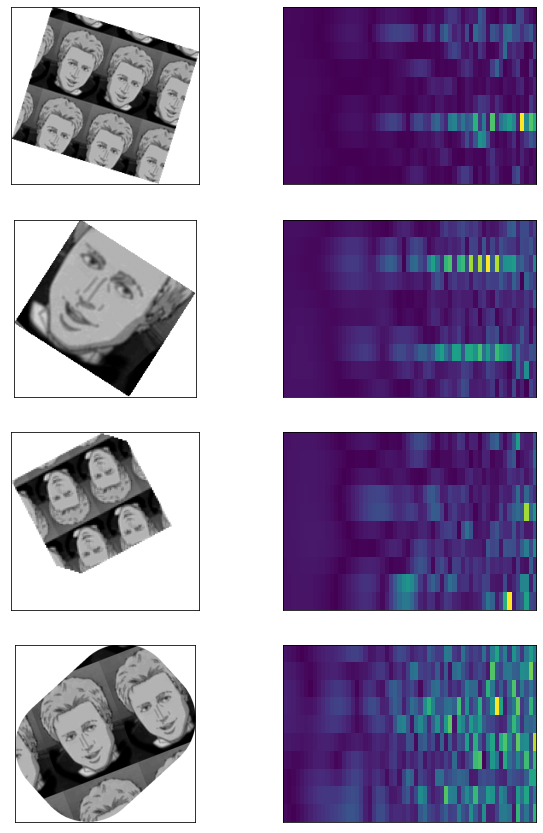

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(10)
plt.setp(ax, xticks=[], yticks=[])

for j, i in enumerate( (12, 11, 15, 14) ):
    img = cv2.imread(f'data/Kid/{i}.jpg')[:, :, 0]
    feat = np.loadtxt(f'data/feature_map/kid{i}.txt')
    ax[j, 0].imshow(img, cmap='gray')
    ax[j, 1].imshow(feat[:60].T, aspect='auto')